## Uppgift 1

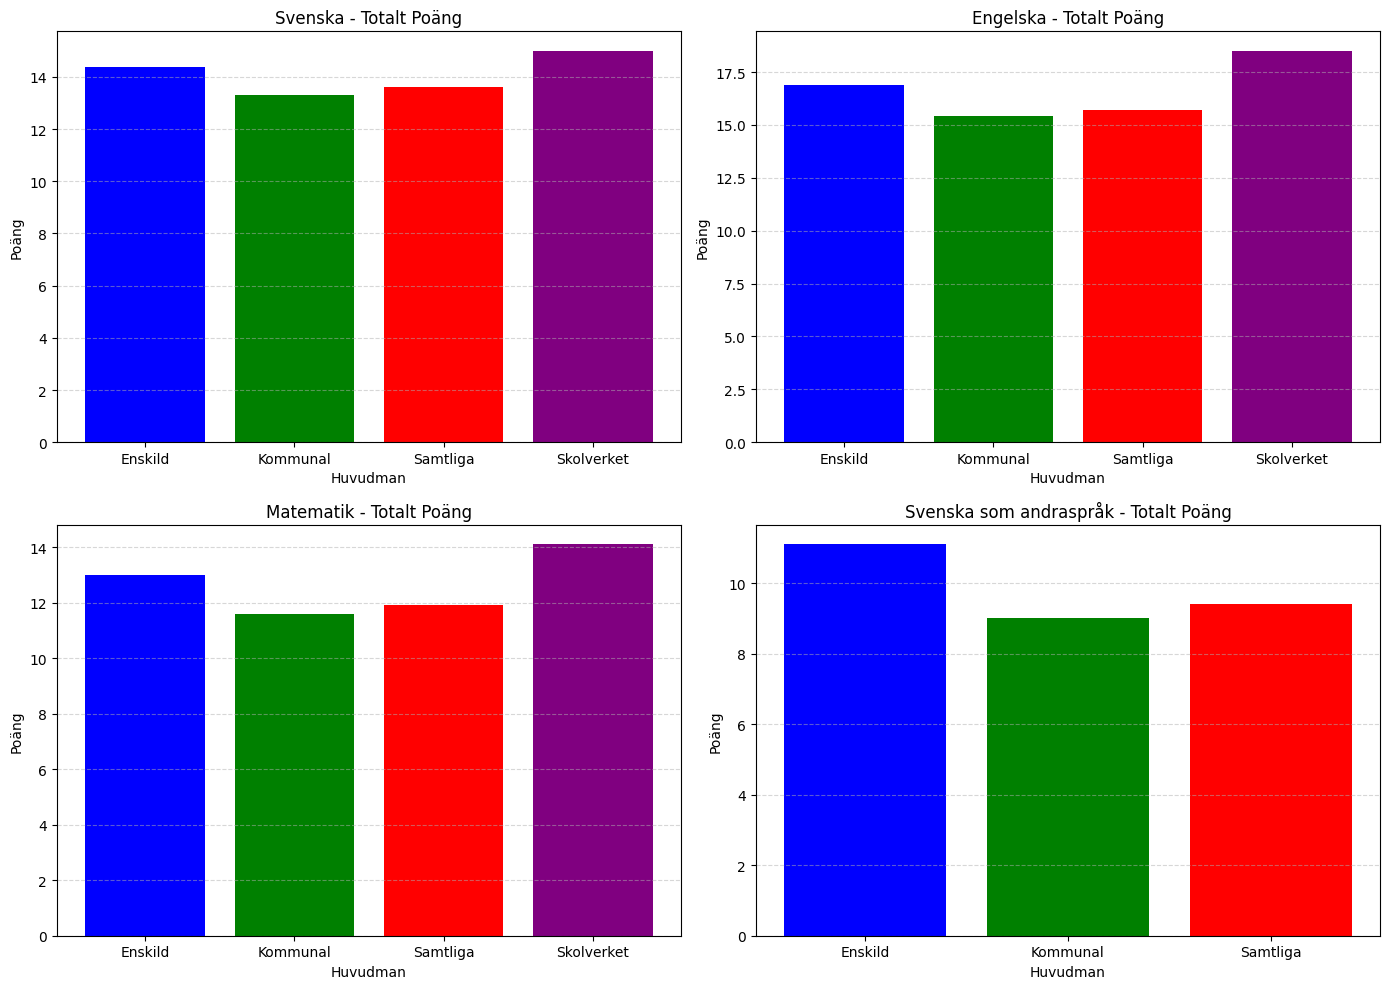

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

filnamn = "C:/Users/pepef/Desktop/labb_2/riket2023_åk9_np.xlsx"  # läser in korrekt  filnamn

columns = ["Plats", "Huvudman", "Totalt_A_F", "Flickor_A_F", "Pojkar_A_F",
           "Totalt_A_E", "Flickor_A_E", "Pojkar_A_E", "Totalt_poäng", "Flickor_poäng", "Pojkar_poäng"]  # ändrar kolumnerna för att få rätt namn

# Funktion för att läsa in sheet och förberera data
def läs_in_sheet(sheet_namn):
    df = pd.read_excel(filnamn, skiprows=8, sheet_name=sheet_namn)
    df.columns = columns
    df["Totalt_poäng"] = pd.to_numeric(df["Totalt_poäng"], errors="coerce")
    return df

# läser in alla ämnen
ämnen = [läs_in_sheet(sheet) for sheet in ["Svenska", "Engelska", "Matematik", "Svenska som andraspråk"]]
ämnen_namn = ["Svenska", "Engelska", "Matematik", "Svenska som andraspråk"]


# Skapa subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#loop för varje ämne och plotta stapeldiagram
for i, ax in enumerate(axes.flatten()):
    df = ämnen[i]
    avg_poäng = df.groupby('Huvudman')["Totalt_poäng"].mean()
    ax.bar(avg_poäng.index, avg_poäng, color=['blue', 'green', 'red', 'purple'])
    ax.set_title(f'{ämnen_namn[i]} - Totalt Poäng')
    ax.set_xlabel('Huvudman')
    ax.set_ylabel('Poäng')
    ax.grid(True, axis='y', linestyle="--", alpha=0.5)

# funktion för att spara grafen som png
plt.savefig("visualiseringar/stapeldiagram_totalt_poang.png")
plt.tight_layout()
plt.show()





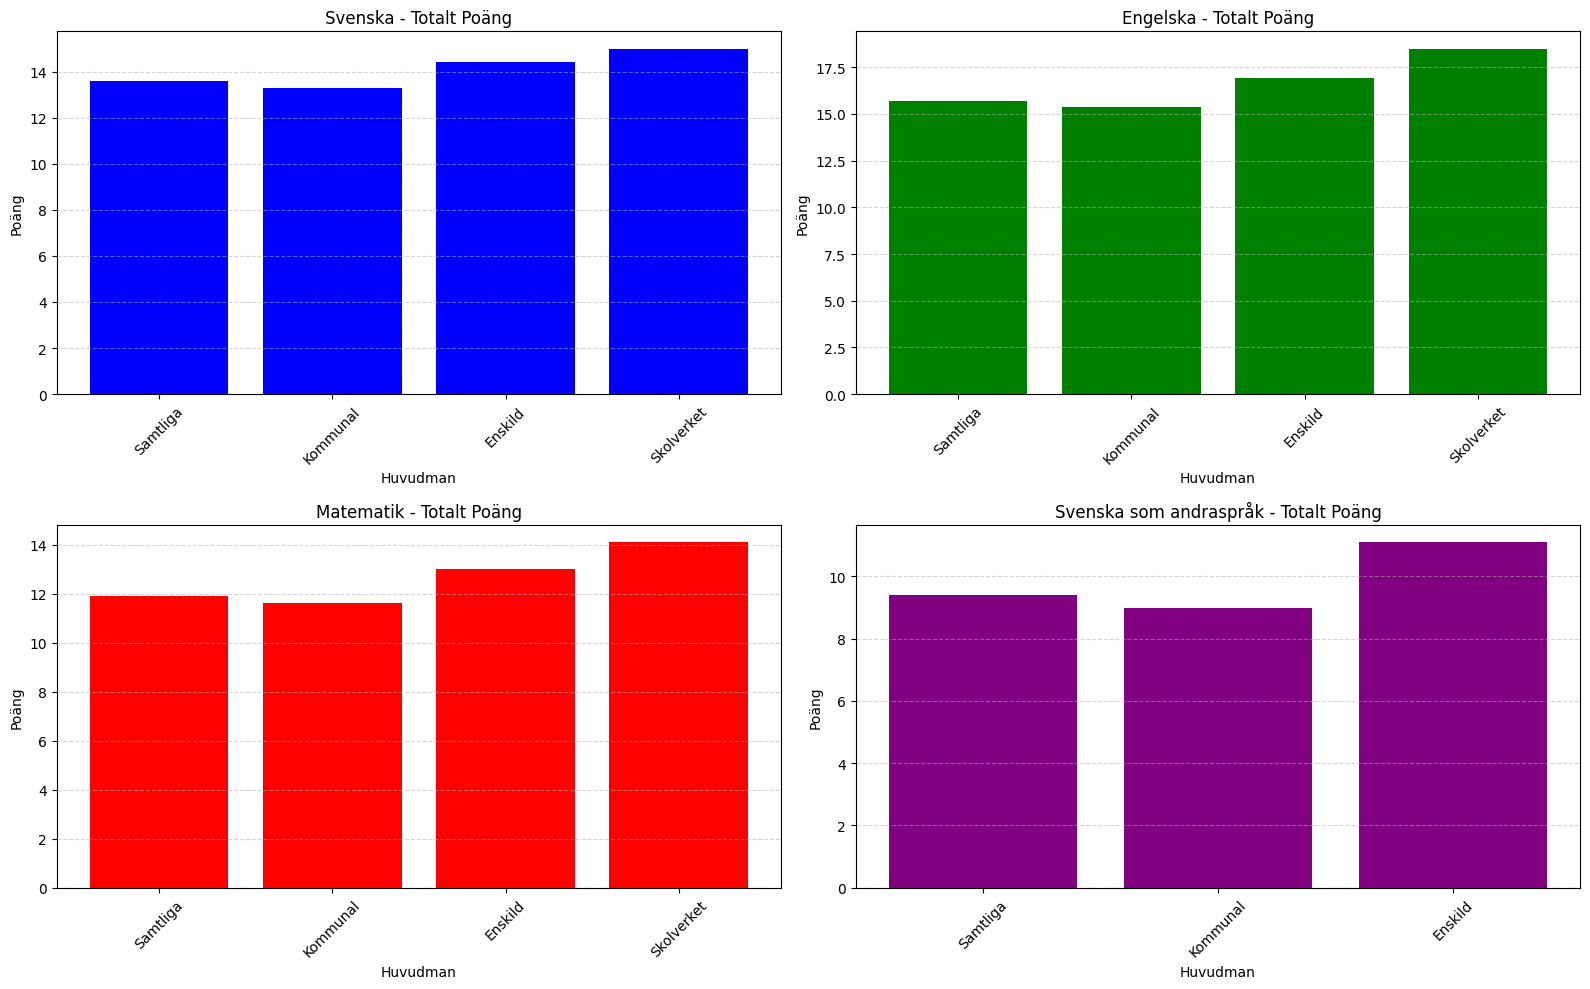

In [3]:
import os

# Extract dataframes for each subject from the 'ämnen' list
df_svenska = ämnen[0]
df_engelska = ämnen[1]
df_matematik = ämnen[2]
df_sva = ämnen[3]

# 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Svenska
axes[0, 0].bar(df_svenska["Huvudman"], df_svenska["Totalt_poäng"], color ="blue")
axes[0, 0].set_title("Svenska - Totalt Poäng")
axes[0, 0].set_xlabel("Huvudman")
axes[0, 0].set_ylabel("Poäng")
plt.sca(axes[0, 0])  
plt.xticks(rotation=45)
axes[0, 0].grid(True, axis='y', linestyle="--", alpha=0.5)


# Engelska
axes[0, 1].bar(df_engelska["Huvudman"], df_engelska["Totalt_poäng"], color='green')
axes[0, 1].set_title("Engelska - Totalt Poäng")
axes[0, 1].set_xlabel("Huvudman")
axes[0, 1].set_ylabel("Poäng")
plt.sca(axes[0, 1])
plt.xticks(rotation=45)
axes[0, 1].grid(True, axis='y', linestyle="--", alpha=0.5)


# Matematik tabelen
axes[1, 0].bar(df_matematik["Huvudman"], df_matematik["Totalt_poäng"], color='red')
axes[1, 0].set_title("Matematik - Totalt Poäng")
axes[1, 0].set_xlabel("Huvudman")
axes[1, 0].set_ylabel("Poäng")
plt.sca(axes[1, 0])
plt.xticks(rotation=45)
axes[1, 0].grid(True, axis='y', linestyle="--", alpha=0.5)


# Svenska som andraspråk tabelen
axes[1, 1].bar(df_sva["Huvudman"], df_sva["Totalt_poäng"], color='purple')
axes[1, 1].set_title("Svenska som andraspråk - Totalt Poäng")
axes[1, 1].set_xlabel("Huvudman")
axes[1, 1].set_ylabel("Poäng")
plt.sca(axes[1, 1])
plt.xticks(rotation=45)
axes[1, 1].grid(True, axis='y', linestyle="--", alpha=0.5)


plt.tight_layout()
plt.savefig("visualiseringar/np_totalt_poäng.png")
plt.show()



## Uppgift 2

In [ ]:

import pandas as pd
import plotly.express as px
import os


# Läs in filen 'betyg_o_prov_riksnivå.xlsx' från rätt sökväg
df_betyg = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7)

